In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

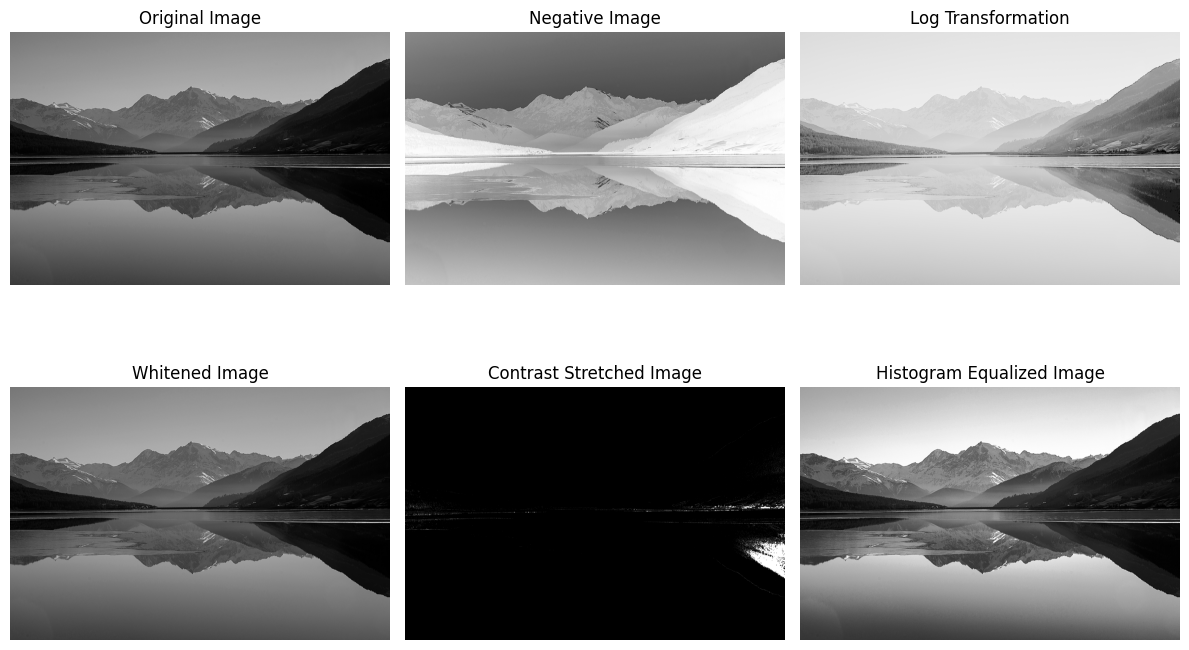

In [20]:
# Load a grayscale image
image = cv2.imread('../datasets/wallpaper.jpg', cv2.IMREAD_GRAYSCALE)

# 1. Image Negative
def image_negative(image):
    L = 256  # Intensity range for 8-bit images
    negative = L - 1 - image
    return negative

# 2. Log Transformation
def log_transformation(image, c=1):
    log_image = c * np.log1p(image.astype(np.float32))  # log1p computes log(1 + r)
    log_image = cv2.normalize(log_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    return log_image

# 3. Image Whitening
def image_whitening(image):
    mean = np.mean(image)
    std = np.std(image)
    whitened_image = (image - mean) / std
    whitened_image = cv2.normalize(whitened_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    return whitened_image

# 4. Contrast Stretching
def contrast_stretching(image):
    min_val, max_val = np.min(image), np.max(image)
    stretched_image = 255 * (image - min_val) / (max_val - min_val)
    return stretched_image.astype(np.uint8)

# 5. Histogram Equalization
def histogram_equalization(image):
    equalized_image = cv2.equalizeHist(image)
    return equalized_image

# Applying the transformations
negative_image = image_negative(image)
log_image = log_transformation(image, c=10)  # Adjust c as needed
whitened_image = image_whitening(image)
stretched_image = contrast_stretching(image)
equalized_image = histogram_equalization(image)

# Display the results
titles = [
    "Original Image",
    "Negative Image",
    "Log Transformation",
    "Whitened Image",
    "Contrast Stretched Image",
    "Histogram Equalized Image",
]
images = [
    image,
    negative_image,
    log_image,
    whitened_image,
    stretched_image,
    equalized_image,
]

plt.figure(figsize=(12, 8))
for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show()